In [1]:
#!/usr/bin/python3
import requests                # Include HTTP Requests module
from bs4 import BeautifulSoup  # Include BS web scraping module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import skew
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from math import sqrt
from sklearn.model_selection import train_test_split
import csv
import os

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'}
url = "https://basketball.realgm.com/nba/stats"
r = requests.get(url, headers=headers)

soup = BeautifulSoup(r.content, "html.parser")
table = soup.find_all('table')[0]
rows = table.find_all('tr')
row_list = list()


In [3]:
for tr in rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    row_list.append(row)


In [4]:
df_bs = pd.DataFrame(row_list,columns=['#','Player','Team','GP',"MPG",'FGM','FGA','FG%','3PM','3PA','3P%','FTM','FTA','FT%','TOV','PF','ORB','DRB','RPG','APG','SPG','BPG','PPG'])
df_bs.set_index('#',inplace=True)

In [5]:
df_bs.to_csv('nbastat.csv')

In [6]:
data=pd.read_csv("nbastat.csv")

In [7]:
del data['#']
del data['Team']
data.columns
data = data.drop([data.index[0]])
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   GP      100 non-null    float64
 2   MPG     100 non-null    float64
 3   FGM     100 non-null    float64
 4   FGA     100 non-null    float64
 5   FG%     100 non-null    float64
 6   3PM     100 non-null    float64
 7   3PA     100 non-null    float64
 8   3P%     100 non-null    float64
 9   FTM     100 non-null    float64
 10  FTA     100 non-null    float64
 11  FT%     100 non-null    float64
 12  TOV     100 non-null    float64
 13  PF      100 non-null    float64
 14  ORB     100 non-null    float64
 15  DRB     100 non-null    float64
 16  RPG     100 non-null    float64
 17  APG     100 non-null    float64
 18  SPG     100 non-null    float64
 19  BPG     100 non-null    float64
 20  PPG     100 non-null    float64
dtypes: float64(20), object(1)
memory usage:

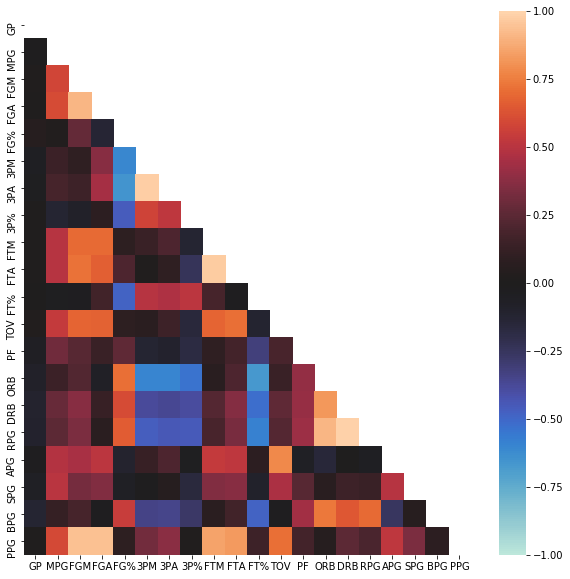

In [8]:
corr=data.corr()

ax = plt.subplots(ncols=1, figsize=(10,10))
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, vmin = -1, vmax = 1, center = 0);
plt.show()


In [9]:
corr

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
GP,1.000000,-0.012966,0.021839,0.013076,0.047420,-0.044738,-0.038245,0.008502,0.011214,0.009755,0.002643,0.029681,-0.052243,-0.079096,-0.104169,-0.099512,-0.022269,-0.061412,-0.119124,0.009988
MPG,-0.012966,1.000000,0.584805,0.605575,0.029795,0.143446,0.182900,-0.118025,0.499531,0.497757,-0.035667,0.534954,0.305040,0.141175,0.286601,0.253306,0.488118,0.501155,0.124939,0.599337
FGM,0.021839,0.584805,1.000000,0.913772,0.277044,0.099550,0.154481,-0.085510,0.699756,0.718842,-0.029121,0.687322,0.239750,0.219222,0.369513,0.337200,0.454372,0.324205,0.187451,0.940399
FGA,0.013076,0.605575,0.913772,1.000000,-0.125721,0.371241,0.449903,0.085640,0.698910,0.668758,0.167758,0.679319,0.138269,-0.066040,0.127124,0.072453,0.511269,0.356258,-0.022212,0.938287
FG%,0.047420,0.029795,0.277044,-0.125721,1.000000,-0.606583,-0.655776,-0.459681,0.089058,0.204909,-0.482033,0.086283,0.260920,0.716596,0.604520,0.662178,-0.103457,-0.055756,0.550776,0.092530
3PM,-0.044738,0.143446,0.099550,0.371241,-0.606583,1.000000,0.981909,0.576659,0.135495,0.022683,0.496259,0.070489,-0.120382,-0.598259,-0.382321,-0.461718,0.129628,-0.008787,-0.340635,0.319298
3PA,-0.038245,0.182900,0.154481,0.449903,-0.655776,0.981909,1.000000,0.520802,0.208515,0.101536,0.472384,0.155045,-0.098388,-0.593964,-0.360713,-0.444694,0.206613,0.050434,-0.348261,0.378830
3P%,0.008502,-0.118025,-0.085510,0.085640,-0.459681,0.576659,0.520802,1.000000,-0.119466,-0.239380,0.514987,-0.149991,-0.172435,-0.535577,-0.388981,-0.448355,-0.037285,-0.161578,-0.266300,0.017870
FTM,0.011214,0.499531,0.699756,0.698910,0.089058,0.135495,0.208515,-0.119466,1.000000,0.973485,0.184549,0.682214,0.098866,0.062635,0.232654,0.190471,0.535576,0.354110,0.075142,0.852942
FTA,0.009755,0.497757,0.718842,0.668758,0.204909,0.022683,0.101536,-0.239380,0.973485,1.000000,-0.018305,0.712137,0.173672,0.206579,0.362552,0.329317,0.521303,0.367379,0.171549,0.833278


In [10]:
data.skew(axis = 0, skipna = True).sort_values(ascending=False)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

GP     8.25000
MPG    4.60000
FGM    2.32500
FGA    4.22500
FG%    0.05800
3PM    1.40000
3PA    3.20000
3P%    0.04925
FTM    1.82500
FTA    2.50000
FT%    0.10275
TOV    1.10000
PF     0.92500
ORB    0.70000
DRB    2.30000
RPG    3.12500
APG    3.45000
SPG    0.40000
BPG    0.50000
PPG    5.37500
dtype: float64


In [11]:
print(data['GP'].quantile(0.10))
print(data['GP'].quantile(0.90))
print(data['MPG'].quantile(0.10))
print(data['MPG'].quantile(0.90))
print(data['PPG'].quantile(0.10))
print(data['PPG'].quantile(0.90))


50.0
64.0
27.290000000000003
35.32
13.09
26.140000000000004


In [12]:
data["GP"] = np.where(data["GP"] <50.0, 50.0,data['GP'])
data["GP"] = np.where(data["GP"] >64.0, 64.0,data['GP'])
print(data['GP'].skew())

data["MPG"] = np.where(data["MPG"] <27.290000000000003, 27.290000000000003,data['MPG'])
data["MPG"] = np.where(data["MPG"] >35.32,35.32,data['MPG'])
print(data['MPG'].skew())

data["PPG"] = np.where(data["PPG"] <13.09,13.09,data['PPG'])
data["PPG"] = np.where(data["PPG"] >26.140000000000004,26.140000000000004,data['PPG'])
print(data['PPG'].skew())


-0.1956401085198056
-0.3217932139859023
0.6139465645353293


In [13]:
y=data["Player"]
X = data.drop(["Player"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((80, 20), (80,), (20, 20), (20,))

In [14]:
X

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,TOV,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG
1,61.0,35.32,9.9,22.7,0.435,4.4,12.6,0.352,10.1,11.8,0.861,4.5,3.4,1.0,5.3,6.4,7.4,1.7,0.9,26.14
2,57.0,35.32,10.4,22.9,0.455,3.0,8.4,0.353,6.8,8.0,0.843,3.4,2.2,0.9,3.3,4.2,6.1,1.2,0.4,26.14
3,57.0,30.90,10.9,20.0,0.547,1.5,4.8,0.306,6.3,10.0,0.633,3.7,3.0,2.3,11.5,13.7,5.8,1.0,1.0,26.14
4,60.0,35.30,9.1,20.8,0.437,3.4,9.5,0.361,8.0,9.3,0.860,4.8,1.7,0.5,3.7,4.2,9.3,1.1,0.1,26.14
5,58.0,35.32,9.2,20.0,0.457,3.9,9.9,0.394,6.7,7.6,0.888,2.9,1.7,0.5,3.8,4.3,7.8,1.0,0.4,26.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,50.0,28.10,4.7,10.4,0.451,1.2,3.4,0.335,2.0,2.4,0.836,1.1,2.3,0.5,3.8,4.3,2.1,1.2,0.5,13.09
97,54.0,27.29,4.7,10.9,0.432,1.3,4.4,0.297,1.8,2.4,0.738,1.6,2.0,0.9,3.6,4.5,1.3,0.4,0.4,13.09
98,56.0,32.40,4.6,11.2,0.412,2.5,6.5,0.383,0.7,1.2,0.567,3.1,2.0,1.1,5.1,6.2,7.0,1.4,0.5,13.09
99,63.0,32.00,4.4,10.8,0.410,1.7,4.8,0.355,1.7,2.3,0.764,1.6,2.9,0.7,3.8,4.5,1.8,0.7,0.3,13.09


In [15]:

Logistic Regression
Naïve Bayes
Stochastic Gradient Descent
K-Nearest Neighbours
Decision Tree
Random Forest
Support Vector Machine



SyntaxError: invalid syntax (<ipython-input-15-80c8cd0212e4>, line 1)

In [16]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array(['James Harden', 'Bradley Beal', 'Giannis Antetokounmpo',
       'Trae Young', 'Damian Lillard', 'Luka Doncic', 'Russell Westbrook',
       'Kawhi Leonard', 'Anthony Davis', 'Karl-Anthony Towns',
       'Devin Booker', 'LeBron James', 'Zach LaVine', 'Brandon Ingram',
       'Donovan Mitchell', 'Pascal Siakam', 'Jayson Tatum',
       'C.J. McCollum', 'DeMar DeRozan', 'Andrew Wiggins', 'Kemba Walker',
       'Khris Middleton', 'Collin Sexton', 'Spencer Dinwiddie',
       'Jaylen Brown', 'Jimmy Butler', 'Bojan Bogdanovic', 'Nikola Jokic',
       'Buddy Hield', 'Kyle Lowry', 'Jrue Holiday', 'Julius Randle',
       'Nikola Vucevic', 'Tobias Harris', 'Shai Gilgeous-Alexander',
       'Kristaps Porzingis', 'Danilo Gallinari', 'Dennis Schroder',
       'LaMarcus Aldridge', 'Evan Fournier', 'Jamal Murray',
       'T.J. Warren', 'Kelly Oubre, Jr.', 'Lou Williams',
       'Montrezl Harrell', 'Domantas Sabonis', "Devonte' Graham",
       'Derrick Rose', 'Terry Rozier', 'Andre Drummond', 'Chr

In [17]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

100

In [18]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred))

1.0


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.2


In [20]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0, 0.5, 'Testing Accuracy')

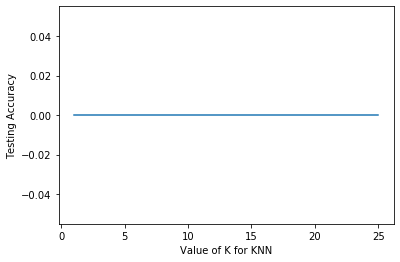

In [21]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [24]:
from sklearn.svm import SVC
classifier=SVC(kernel ='linear', C=1, gamma=1)
classifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
y_pred= classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.0


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
#Prediciting the test set result
y_pred=model.predict(X_test)
#Confusing Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
model.score(X_test,y_test)

0.0